<a href="https://colab.research.google.com/github/2303a52209/Gen-AI/blob/main/Assignment_8_1_2209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adadelta


In [2]:
wine_data = pd.read_csv('/content/winequality-red.csv', delimiter=',')

print(wine_data.head())
print(wine_data.info())
print(wine_data.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

print(f"Unique values in quality: {np.unique(y)}")

Unique values in quality: [3 4 5 6 7 8]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train shape: (1279, 11)
X_test shape: (320, 11)


In [6]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
if len(np.unique(y)) <= 2:
    model.add(Dense(1, activation='sigmoid'))
else:
    model.add(Dense(len(np.unique(y)), activation='softmax'))


optimizer = Adadelta()
if len(np.unique(y)) <= 2:
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
else:
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

y_train = y_train - y_train.min()
y_test = y_test - y_test.min()

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=64,
    verbose=1,
    validation_split=0.2,
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │             525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,551 (6.06 KB)

 Trainable params: 1,551 (6.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.0347 - loss: 1.7729 - val_accuracy: 0.0352 - val_loss: 1.7638
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0285 - loss: 1.7730 - val_accuracy: 0.0352 - val_loss: 1.7637
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0315 - loss: 1.7717 - val_accuracy: 0.0352 - val_loss: 1.7636
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0290 - loss: 1.7704 - val_accuracy: 0.0352 - val_loss: 1.7636
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0360 - loss: 1.7691 - val_accuracy: 0.0352 - val_loss: 1.7635
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0338 - loss: 1.7702 - val_accuracy: 0.0352 - val_loss: 1.7635
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0330 - loss: 1.7715 - val_accuracy: 0.0352 - val_loss: 1.7634
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0386 - loss: 1.7715 - val_accuracy: 0.03

Model saved successfully as 'wine_quality_model.h5'
Test accuracy: 0.0312
Training accuracy: 0.0336
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.03      1.00      0.06        10
           2       0.00      0.00      0.00       130
           3       0.00      0.00      0.00       132
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00         5

    accuracy                           0.03       320
   macro avg       0.01      0.17      0.01       320
weighted avg       0.00      0.03      0.00       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KeyError: 'val_accuracy'

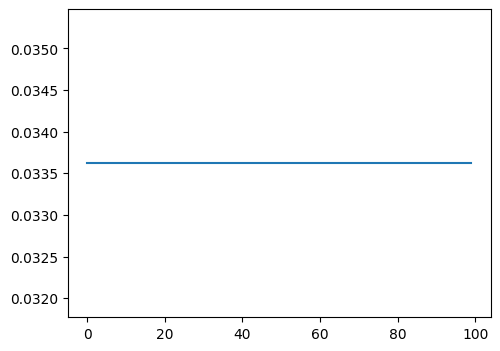

In [12]:
model.save('wine_quality_model.h5')
print("Model saved successfully as 'wine_quality_model.h5'")


test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Training accuracy: {train_accuracy:.4f}")

y_pred_probs = model.predict(X_test_scaled)
if len(np.unique(y)) <= 2:
    y_pred = (y_pred_probs > 0.5).astype("int32")
else:
    y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png')
plt.close()

print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.savefig('training_history.png')
plt.close()

**Prediction**

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

def load_and_prepare_model():
    model = load_model('wine_quality_model.h5')
    print("Model loaded successfully!")
    return model

def preprocess_input(input_data, train_data_path='/content/winequality-red.csv'):
    train_data = pd.read_csv(train_data_path, delimiter=',')
    X_train = train_data.drop('quality', axis=1)

    scaler = StandardScaler()
    scaler.fit(X_train)

    input_scaled = scaler.transform(input_data)
    return input_scaled

In [27]:
def predict_wine_quality(model, input_data):
    predictions = model.predict(input_data)

    if predictions.shape[1] == 1:
        predicted_quality = (predictions > 0.5).astype(int).flatten()
    else:
        predicted_quality = np.argmax(predictions, axis=1)

    return predicted_quality

def main():

  def predict_wine_quality(model, input_data):
    predictions = model.predict(input_data)

    if predictions.shape[1] == 1:
        predicted_quality = (predictions > 0.5).astype(int).flatten()
    else:
        predicted_quality = np.argmax(predictions, axis=1)

    return predicted_quality


def main():
    model = load_and_prepare_model()

    sample_data = pd.read_csv('/content/winequality-red.csv', delimiter=',').drop('quality', axis=1).head(5)
    print("Sample input data:")
    print(sample_data)

    preprocessed_data = preprocess_input(sample_data)

    predictions = predict_wine_quality(model, preprocessed_data)

    print("\nPredicted wine quality:")
    for i, prediction in enumerate(predictions):
        print(f"Sample {i+1}: Quality {prediction}")

if __name__ == "__main__":
    main()

Model loaded successfully!
Sample input data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2